In [42]:
#Relevant imports
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import time
from sklearn import metrics
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import joblib
warnings.filterwarnings('ignore')

In [43]:
from xgboost import *

In [44]:
(X_train_full, y_train_full), (X_test_final, y_test_final) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [45]:
check_rows = 0
counter = 0
    
for img in X_train_full:
    check_rows = 0
    check_rows = 0 if img[0:2].sum() == 0 else 1
    check_rows += 0 if img[26:28].sum() == 0 else 1
    if check_rows == 0:
        counter += 1

print(counter)
print(counter  / 60000)

18799
0.3133166666666667


In [46]:
X_train_full = pd.DataFrame(X_train_full.reshape(60000, 28*28))
X_test_final = pd.DataFrame(X_test_final.reshape(10000, 28*28))

In [47]:
# plt.imshow(X_train_full.loc[0].to_numpy().reshape(28, 28), cmap = 'gray')
# plt.title('Class: {}'.format(y_train_full[0]))
# plt.figure()

In [48]:
missing_vals = pd.DataFrame(X_train_full.isnull().sum(), columns = ['Amount of missing values:'])
missing_vals['Percentage of missing values:']= (missing_vals / len(X_train_full)).round(4) * 100
missing_vals

,Amount of missing values:,Percentage of missing values:
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
779,0,0.0
780,0,0.0
781,0,0.0
782,0,0.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full,
                                                                test_size = 0.1, random_state = 0)

In [50]:
 # duplicates

In [51]:
print("Before removing duplicates: ", X_train.shape)
temp_copy_x = X_train
temp_copy_x['y'] = y_train

temp_copy_x = temp_copy_x.drop_duplicates()

X_train = temp_copy_x.drop(['y'], axis = 1)
y_train = temp_copy_x['y']

print("After removing duplicates: ", X_train.shape)

Before removing duplicates:  (54000, 784)
After removing duplicates:  (54000, 784)


In [52]:
# scaling

In [53]:
min_max_scaler = MinMaxScaler()
X_train= pd.DataFrame(min_max_scaler.fit_transform(X_train.values))
X_test = pd.DataFrame(min_max_scaler.transform(X_test.values)) #only transforming the test and validation sets
X_test_final = pd.DataFrame(min_max_scaler.transform(X_test_final.values))
X_train

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.000000,0.004348,0.000000,0.004525,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.592157,0.611765,0.341176,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.043137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.800000,0.403922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.004525,0.000000,0.000000,0.000000,...,0.007843,0.000000,0.266667,0.576471,0.662745,0.207843,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015686,0.000000,0.211765,0.721569,0.552941,0.505882,0.494118,0.494118,0.235294,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53995,0.0,0.0,0.0,0.0,0.004464,0.013043,0.000000,0.000000,0.000000,0.000000,...,0.427451,0.423529,0.584314,0.109804,0.000000,0.015686,0.000000,0.000000,0.000000,0.0
53996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
53997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.397638,0.235294,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.372549,0.525490,0.560784,0.156863,0.0
53998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.419608,0.192157,0.101961,0.000000,0.000000,0.000000,0.0


In [54]:
#PCA

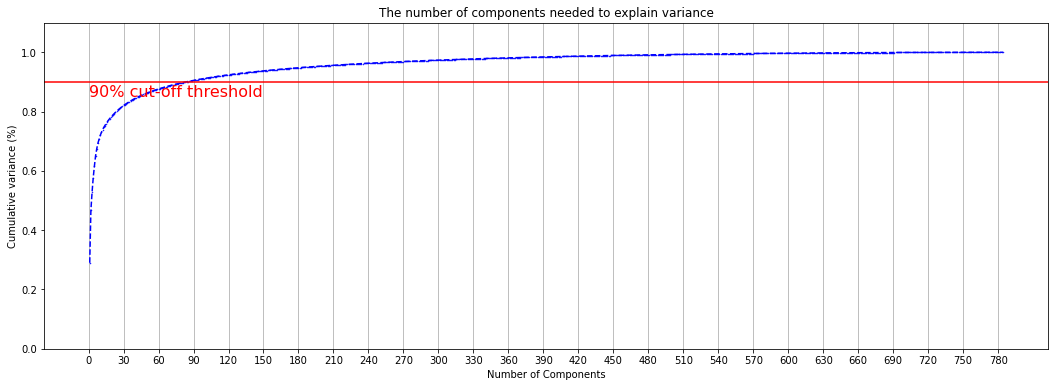

In [55]:
pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (18,6)

fig, ax = plt.subplots()
xi = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b' ,markersize = 1)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 785, step=30)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [56]:
pca = PCA(n_components=90)
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))
X_test_final = pd.DataFrame(pca.transform(X_test_final))


X_train.shape

(54000, 90)

In [57]:
def results(model):
    y_pred=model.predict(x_test_scaled)
    plt.figure(figsize=(5,4))
    conf =confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ")
    sns.heatmap(conf, cmap = "Blues", annot=True, fmt = '.0f')
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    print(classification_report(y_test, y_pred,digits=4))

In [58]:
#classifiers

In [59]:
#dummy

Accuracy Dummy:  0.1
Time taken to achive result: 0.007521152496337891 seconds
              precision    recall  f1-score   support

           0       0.09      0.09      0.09       583
           1       0.10      0.10      0.10       588
           2       0.10      0.09      0.10       633
           3       0.09      0.09      0.09       619
           4       0.10      0.10      0.10       597
           5       0.10      0.09      0.10       632
           6       0.10      0.10      0.10       578
           7       0.11      0.12      0.12       566
           8       0.09      0.09      0.09       580
           9       0.13      0.12      0.12       624

    accuracy                           0.10      6000
   macro avg       0.10      0.10      0.10      6000
weighted avg       0.10      0.10      0.10      6000



<AxesSubplot:>

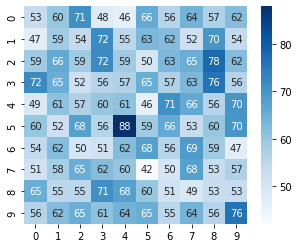

In [60]:
start_timeDummy = time.time()
dummyModel = DummyClassifier(strategy="stratified")
dummyModel.fit(X_train, y_train)
predictionsDummy = dummyModel.predict(X_test)
joblib.dump(dummyModel, 'dummyModel.joblib')
joblib.dump((time.time() - start_timeDummy), 'time_dummyModel.joblib')

accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
print("Accuracy Dummy: ", accuracyDummy)
timeDummy = time.time() - start_timeDummy
print("Time taken to achive result: %s seconds" % (timeDummy))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsDummy, zero_division = 0))
sns.heatmap(confusion_matrix(y_test, predictionsDummy), cmap = "Blues", annot=True, fmt = '.0f')

In [61]:
# dummyModel = joblib.load('dummyModel.joblib')
# timeDummy = joblib.load('time_dummyModel.joblib')

# predictionsDummy = dummyModel.predict(X_test)
# accuracyDummy = metrics.accuracy_score(y_test, predictionsDummy)
# print("Accuracy Dummy: ", accuracyDummy)
# print("Time taken to achive result: %s seconds" % (timeDummy))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsDummy, zero_division = 0))
# sns.heatmap(confusion_matrix(y_test, predictionsDummy), cmap = "Blues", annot=True, fmt = '.0f')

In [62]:
#logistic

Accuracy (Logistic Regression):  0.8468333333333333
Time taken to achive result: 1.706824779510498 seconds
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       583
           1       0.97      0.96      0.96       588
           2       0.78      0.74      0.76       633
           3       0.84      0.87      0.85       619
           4       0.73      0.75      0.74       597
           5       0.93      0.92      0.93       632
           6       0.61      0.61      0.61       578
           7       0.90      0.93      0.91       566
           8       0.95      0.92      0.94       580
           9       0.95      0.94      0.94       624

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



<AxesSubplot:>

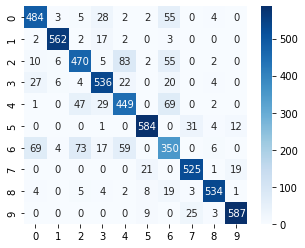

In [63]:
start_timeLogReg = time.time()
warnings.filterwarnings('ignore')
modelLogReg = LogisticRegression()
modelLogReg.fit(X_train, y_train)
predictionsLogReg = modelLogReg.predict(X_test)
joblib.dump(modelLogReg, 'modelLogReg.joblib')
joblib.dump((time.time() - start_timeLogReg), 'time_modelLogReg.joblib')

accuracyLogReg = modelLogReg.score(X_test, y_test)
print("Accuracy (Logistic Regression): ", accuracyLogReg)
timeLogReg = time.time() - start_timeLogReg
print("Time taken to achive result: %s seconds" % (timeLogReg))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsLogReg))
sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

In [64]:
# modelLogReg = joblib.load('modelLogReg.joblib')
# timeLogReg = joblib.load('time_modelLogReg.joblib')

# predictionsLogReg = modelLogReg.predict(X_test)
# accuracyLogReg = modelLogReg.score(X_test, y_test)
# print("Accuracy (Logistic Regression): ", accuracyLogReg)
# print("Time taken to achive result: %s seconds" % (timeLogReg))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsLogReg))
# sns.heatmap(confusion_matrix(y_test, predictionsLogReg), cmap = "Blues", annot=True, fmt = '.0f')

In [65]:
#knn

Best Score is: 0.8698333333333333,  Best n_neighbors is: 8 .


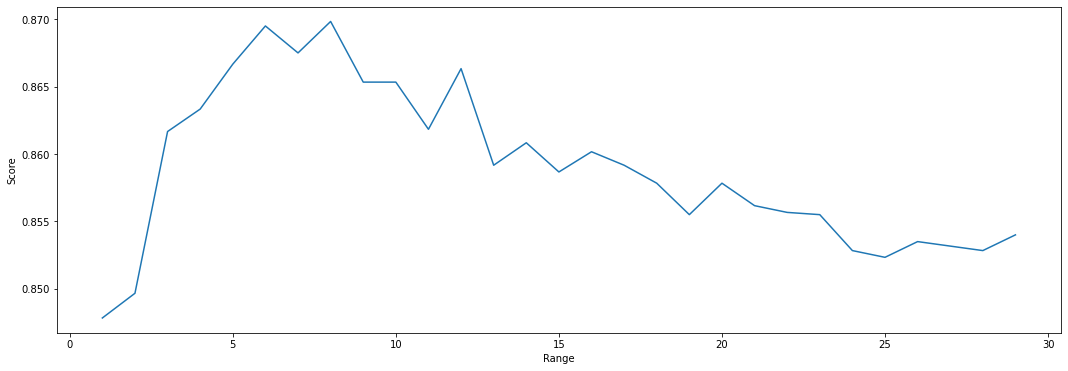

In [67]:
scores = []
best_score = 0
best_i = 0
for i in range(1,30):
    knn_i = KNeighborsClassifier(n_neighbors = i , n_jobs = -1)
    knn_i.fit(X_train,y_train)
    scores.append(knn_i.score(X_test,y_test))
    if best_score < scores[-1]:
        best_score = scores[-1]
        best_i = i
print(f'Best Score is: {best_score},  Best n_neighbors is: {best_i} .')
plt.plot(range(1,30),scores)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

Accuracy (KNN):  0.8698333333333333
Time taken to achive result: 0.9040288925170898 seconds
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       583
           1       0.99      0.96      0.97       588
           2       0.79      0.82      0.81       633
           3       0.90      0.88      0.89       619
           4       0.77      0.77      0.77       597
           5       0.99      0.90      0.94       632
           6       0.66      0.60      0.63       578
           7       0.92      0.96      0.94       566
           8       0.98      0.97      0.97       580
           9       0.92      0.96      0.94       624

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



<AxesSubplot:>

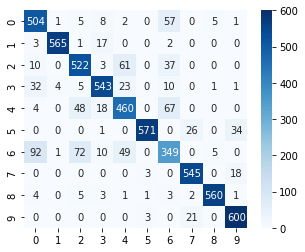

In [69]:
start_timeKNN = time.time()
modelKNN = KNeighborsClassifier(n_neighbors = 8)
modelKNN.fit(X_train, y_train)
predictionsKNN = modelKNN.predict(X_test)
joblib.dump(modelKNN, 'modelKNN.joblib')
joblib.dump((time.time() - start_timeKNN), 'time_modelKNN.joblib')

accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
print("Accuracy (KNN): ", accuracyKNN)
timeKNN = time.time() - start_timeKNN
print("Time taken to achive result: %s seconds" % (timeKNN))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsKNN))
sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

In [70]:
# modelKNN = joblib.load('modelKNN.joblib')
# timeKNN = joblib.load('time_modelKNN.joblib')

# predictionsKNN = modelKNN.predict(X_test)
# accuracyKNN = metrics.accuracy_score(y_test, predictionsKNN)
# print("Accuracy (KNN): ", accuracyKNN)
# print("Time taken to achive result: %s seconds" % (timeKNN))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsKNN))
# sns.heatmap(confusion_matrix(y_test, predictionsKNN), cmap = "Blues", annot=True, fmt = '.0f')

In [18]:
#gaussian naive bayes

Accuracy (Gaussian Naive Bayes):  0.7625
Time taken to achive result: 0.14603781700134277 seconds
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       583
           1       0.99      0.89      0.94       588
           2       0.72      0.63      0.67       633
           3       0.80      0.79      0.79       619
           4       0.71      0.64      0.67       597
           5       0.85      0.74      0.79       632
           6       0.49      0.53      0.51       578
           7       0.77      0.89      0.82       566
           8       0.70      0.87      0.78       580
           9       0.92      0.90      0.91       624

    accuracy                           0.76      6000
   macro avg       0.77      0.76      0.76      6000
weighted avg       0.77      0.76      0.76      6000



<AxesSubplot:>

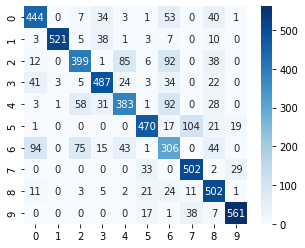

In [71]:
start_timeGaussianNB = time.time()
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
predictionsGNB = modelGNB.predict(X_test)
joblib.dump(modelGNB, 'modelGNB.joblib')
joblib.dump((time.time() - start_timeGaussianNB), 'time_modelGNB.joblib')

accuracyGNB = metrics.accuracy_score(y_test, predictionsGNB)
print("Accuracy (Gaussian Naive Bayes): ", accuracyGNB)
timeGNB = time.time() - start_timeGaussianNB
print("Time taken to achive result: %s seconds" % (timeGNB))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsGNB))
sns.heatmap(confusion_matrix(y_test, predictionsGNB), cmap = "Blues", annot=True, fmt = '.0f')

In [72]:
# modelGNB = joblib.load('modelGNB.joblib')
# timeGNB = joblib.load('time_modelGNB.joblib')

# predictionsGNB = modelGNB.predict(X_test)
# accuracyGNB = metrics.accuracy_score(y_test, predictionsGNB)
# print("Accuracy (Gaussian Naive Bayes): ", accuracyGNB)
# timeGNB = time.time() - start_timeGaussianNB
# print("Time taken to achive result: %s seconds" % (timeGNB))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsGNB))
# sns.heatmap(confusion_matrix(y_test, predictionsGNB), cmap = "Blues", annot=True, fmt = '.0f')

In [20]:
#random forest - basic parameters

Accuracy (Random Forests):  0.8753333333333333
Time taken to achive result: 37.3340802192688 seconds
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       583
           1       1.00      0.95      0.97       588
           2       0.81      0.83      0.82       633
           3       0.87      0.90      0.88       619
           4       0.77      0.82      0.79       597
           5       0.94      0.94      0.94       632
           6       0.73      0.59      0.65       578
           7       0.93      0.93      0.93       566
           8       0.94      0.96      0.95       580
           9       0.94      0.96      0.95       624

    accuracy                           0.88      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.88      0.87      6000



<AxesSubplot:>

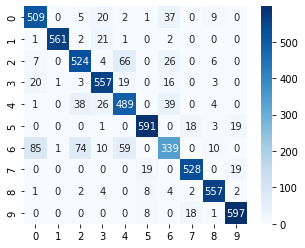

In [73]:
start_timeRandForests = time.time()
modelRandForests = RandomForestClassifier(n_estimators = 300, n_jobs = -1, random_state = 0)
modelRandForests.fit(X_train, y_train)
predictionsRandForests = modelRandForests.predict(X_test)
joblib.dump(modelRandForests, 'modelRandForests.joblib')
joblib.dump((time.time() - start_timeRandForests), 'time_modelRandForests.joblib')

accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
print("Accuracy (Random Forests): ", accuracyRandForests)
timeRandForests = time.time() - start_timeRandForests
print("Time taken to achive result: %s seconds" % (timeRandForests))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsRandForests))
sns.heatmap(confusion_matrix(y_test, predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [74]:
# modelRandForests = joblib.load('modelRandForests.joblib')
# timeRandForests = joblib.load('time_modelRandForests.joblib')

# predictionsRandForests = modelRandForests.predict(X_test)
# accuracyRandForests = metrics.accuracy_score(y_test, predictionsRandForests)
# print("Accuracy (Random Forests): ", accuracyRandForests)
# print("Time taken to achive result: %s seconds" % (timeRandForests))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsRandForests))
# sns.heatmap(confusion_matrix(y_test, predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [53]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1900, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700, 1900], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [23]:
#grid search

In [24]:
# First create the base model to tune
# rf = RandomForestClassifier()

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
# rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1300; total time=36.0min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=1500; total time=42.7min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=700; total time=13.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=900; total time=27.7min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1300; total time=25.0min
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=700; total time=21.0min
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estima

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                                                         1700, 1900]},
                   random_state=42, verbose=2)

In [39]:
#best params
# joblib.dump(RandomForestClassifier, 'RandomForestClassifier.joblib')
# random_forest_best_params = rf_random.best_params_
# joblib.dump(random_forest_best_params, 'random_forest_best_params.joblib')

In [42]:
RandomForestClassifier = joblib.load('RandomForestClassifier.joblib')
random_forest_best_params = joblib.load('random_forest_best_params.joblib')
random_forest_best_params

{'n_estimators': 1500,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

Accuracy (Random Forests):  0.8785
Time taken to achive result: 1234.254382133484 seconds
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       583
           1       0.99      0.96      0.98       588
           2       0.81      0.82      0.82       633
           3       0.87      0.90      0.89       619
           4       0.77      0.82      0.80       597
           5       0.94      0.95      0.94       632
           6       0.74      0.60      0.66       578
           7       0.94      0.93      0.94       566
           8       0.95      0.96      0.95       580
           9       0.94      0.96      0.95       624

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



<AxesSubplot:>

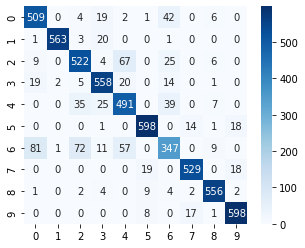

In [ ]:
start_time_best_RandForests = time.time()
best_modelRandForests = RandomForestClassifier(n_estimators = 1500, min_samples_split = 2, min_samples_leaf = 2, max_features = 'auto', max_depth = 80, bootstrap = False)
best_modelRandForests.fit(X_train, y_train)
best_predictionsRandForests = best_modelRandForests.predict(X_test)
joblib.dump(best_modelRandForests, 'best_modelRandForests.joblib')
joblib.dump((time.time() - start_time_best_RandForests), 'time_best_modelRandForests.joblib')

best_accuracyRandForests = metrics.accuracy_score(y_test, best_predictionsRandForests)
print("Accuracy (Random Forests): ", best_accuracyRandForests)
time_best_RandForests = time.time() - start_time_best_RandForests
print("Time taken to achive result: %s seconds" % (time_best_RandForests))

plt.figure(figsize=(5,4))
print(classification_report(y_test, best_predictionsRandForests))
sns.heatmap(confusion_matrix(y_test, best_predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [76]:
# best_modelRandForests = joblib.load('best_modelRandForests.joblib')
# time_best_RandForests = joblib.load('time_best_modelRandForests.joblib')

# best_predictionsRandForests = best_modelRandForests.predict(X_test)
# best_accuracyRandForests = metrics.accuracy_score(y_test, best_predictionsRandForests)
# print("Accuracy (Best Random Forests): ", best_accuracyRandForests)
# print("Time taken to achive result: %s seconds" % (time_best_RandForests))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, best_predictionsRandForests))
# sns.heatmap(confusion_matrix(y_test, best_predictionsRandForests), cmap = "Blues", annot=True, fmt = '.0f')

In [26]:
#xgboost

Accuracy (XGBoost):  0.8965
Time taken to achive result: 1886.2431070804596 seconds
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       583
           1       0.99      0.96      0.98       588
           2       0.83      0.83      0.83       633
           3       0.89      0.91      0.90       619
           4       0.81      0.83      0.82       597
           5       0.97      0.97      0.97       632
           6       0.75      0.69      0.72       578
           7       0.94      0.96      0.95       566
           8       0.97      0.97      0.97       580
           9       0.96      0.96      0.96       624

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



<AxesSubplot:>

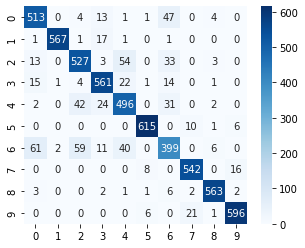

In [ ]:
start_timeXGBoost = time.time()
modelXGBoost = XGBClassifier(learning_rate = 0.2, n_estimators = 700, verbosity = 0, use_label_encoder = False,
                             n_jobs = -1, objective = 'multi:softmax')
modelXGBoost.fit(X_train, y_train)
predictionsXGBoost = modelXGBoost.predict(X_test)
joblib.dump(modelXGBoost, 'modelXGBoost.joblib')
joblib.dump((time.time() - start_timeXGBoost), 'time_modelXGBoost.joblib')


accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
print("Accuracy (XGBoost): ", accuracyXGBoost)
timeXGBoost = time.time() - start_timeXGBoost
print("Time taken to achive result: %s seconds" % (timeXGBoost))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsXGBoost))
sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [78]:
# modelXGBoost = joblib.load('modelXGBoost.joblib')
# timeXGBoost = joblib.load('time_modelXGBoost.joblib')

# predictionsXGBoost = modelXGBoost.predict(X_test)
# accuracyXGBoost = metrics.accuracy_score(y_test, predictionsXGBoost)
# print("Accuracy (XGBoost): ", accuracyXGBoost)
# print("Time taken to achive result: %s seconds" % (timeXGBoost))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsXGBoost))
# sns.heatmap(confusion_matrix(y_test, predictionsXGBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#adaboost

Accuracy (AdaBoost):  0.8798333333333334
Time taken to achive result: 1287.0952780246735 seconds
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       583
           1       1.00      0.96      0.98       588
           2       0.81      0.83      0.82       633
           3       0.87      0.90      0.89       619
           4       0.77      0.82      0.80       597
           5       0.94      0.94      0.94       632
           6       0.75      0.60      0.67       578
           7       0.94      0.93      0.94       566
           8       0.94      0.96      0.95       580
           9       0.94      0.96      0.95       624

    accuracy                           0.88      6000
   macro avg       0.88      0.88      0.88      6000
weighted avg       0.88      0.88      0.88      6000



<AxesSubplot:>

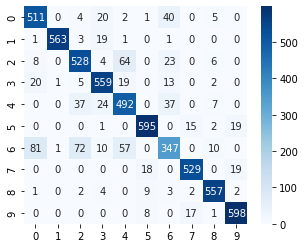

In [79]:
start_timeAdaBoost = time.time()
modelAdaBoost = AdaBoostClassifier(best_modelRandForests, n_estimators = 200, random_state = 0, learning_rate = 0.2)
modelAdaBoost.fit(X_train, y_train)
predictionsAdaBoost = modelAdaBoost.predict(X_test)
joblib.dump(modelAdaBoost, 'modelAdaBoost.joblib')
joblib.dump((time.time() - start_timeAdaBoost), 'time_modelAdaBoost.joblib')

accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
print("Accuracy (AdaBoost): ", accuracyAdaBoost)
timeAdaBoost = time.time() - start_timeAdaBoost
print("Time taken to achive result: %s seconds" % (timeAdaBoost))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsAdaBoost))
sns.heatmap(confusion_matrix(y_test, predictionsAdaBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [80]:
# modelAdaBoost = joblib.load('modelAdaBoost.joblib')
# timeAdaBoost = joblib.load('time_modelAdaBoost.joblib')

# predictionsAdaBoost = modelAdaBoost.predict(X_test)
# accuracyAdaBoost = metrics.accuracy_score(y_test, predictionsAdaBoost)
# print("Accuracy (AdaBoost): ", accuracyAdaBoost)
# print("Time taken to achive result: %s seconds" % (timeAdaBoost))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsAdaBoost))
# sns.heatmap(confusion_matrix(y_test, predictionsAdaBoost), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#voting 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy (Voting):  0.8961666666666667
Time taken to achive result: 3223.5377168655396 seconds


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       583
           1       0.99      0.96      0.98       588
           2       0.83      0.84      0.83       633
           3       0.89      0.91      0.90       619
           4       0.80      0.83      0.82       597
           5       0.97      0.97      0.97       632
           6       0.76      0.69      0.72       578
           7       0.94      0.96      0.95       566
           8       0.97      0.97      0.97       580
           9       0.96      0.96      0.96       624

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



<AxesSubplot:>

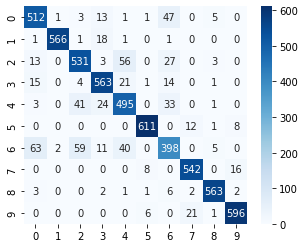

In [81]:
start_timeVoting = time.time()
# warnings.filterwarnings('ignore')
modelVoting = VotingClassifier(
    estimators=
        [('KNN', modelKNN),
         ('XGBoost', modelXGBoost),
         ('AdaBoost', modelAdaBoost)],
    voting='soft', n_jobs=-1, weights=[1, 4, 2])
modelVoting.fit(X_train, y_train)
predictionsVoting = modelVoting.predict(X_test)
joblib.dump(modelVoting, 'modelVoting.joblib')
joblib.dump((time.time() - start_timeVoting), 'time_modelVoting.joblib')

         
accuracyVoting = metrics.accuracy_score(y_test, predictionsVoting)
print("Accuracy (Voting): ", accuracyVoting)
timeVoting = time.time() - start_timeVoting
print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsVoting))
sns.heatmap(confusion_matrix(y_test, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')

In [82]:
# modelVoting = joblib.load('modelVoting.joblib')
# timeVoting = joblib.load('time_modelVoting.joblib')

# predictionsVoting = modelVoting.predict(X_test)
# accuracyVoting = metrics.accuracy_score(y_test, predictionsVoting)
# print("Accuracy: ", accuracyVoting)
# print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsVoting))
# sns.heatmap(confusion_matrix(y_test, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#stacking

In [ ]:
start_timeStacking = time.time()
warnings.filterwarnings('ignore')
modelStacking = StackingClassifier(estimators= [('KNN', modelKNN),
                                      ('XGBoost', modelXGBoost),
                                      ('RandForests', best_modelRandForests),
                                      ('AdaBoost', modelAdaBoost)],
                         final_estimator = modelXGBoost)
modelStacking.fit(X_train, y_train)
predictionsStacking = modelStacking.predict(X_test)
joblib.dump(modelStacking, 'modelStacking.joblib')
joblib.dump((time.time() - start_timeStacking), 'time_modelStacking.joblib')



accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
print("Accuracy: ", accuracyStacking)
timeStacking = time.time() - start_timeStacking
print("Time taken to achive result: %s seconds\n\n" % (timeStacking))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsStacking))
sns.heatmap(confusion_matrix(y_test, predictionsStacking), cmap = "Blues", annot=True, fmt = '.0f')

Accuracy:  0.8943333333333333
Time taken to achive result: 10825.018029212952 seconds


              precision    recall  f1-score   support

           0       0.85      0.87      0.86       583
           1       0.99      0.97      0.98       588
           2       0.82      0.83      0.82       633
           3       0.88      0.92      0.90       619
           4       0.80      0.82      0.81       597
           5       0.96      0.98      0.97       632
           6       0.75      0.67      0.71       578
           7       0.95      0.95      0.95       566
           8       0.97      0.97      0.97       580
           9       0.97      0.95      0.96       624

    accuracy                           0.89      6000
   macro avg       0.89      0.89      0.89      6000
weighted avg       0.89      0.89      0.89      6000



<AxesSubplot:>

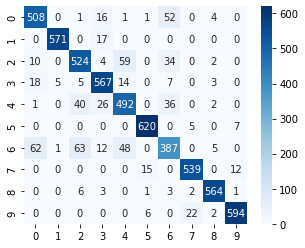

In [61]:
# modelStacking = joblib.load('modelStacking.joblib')
# timeStacking = joblib.load('time_modelStacking.joblib')

# predictionsStacking = modelStacking.predict(X_test)
# accuracyStacking = metrics.accuracy_score(y_test, predictionsStacking)
# print("Accuracy: ", accuracyStacking)
# timeStacking = time.time() - start_timeStacking
# print("Time taken to achive result: %s seconds\n\n" % (timeStacking))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test, predictionsStacking))
# sns.heatmap(confusion_matrix(y_test, predictionsStacking), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
#Bagging
modelXGBoostNew = XGBClassifier(learning_rate = 0.2, n_estimators = 400, verbosity = 0, use_label_encoder = False,
                             n_jobs = -1, objective = 'multi:softmax')
start_timeBagging = time.time()
warnings.filterwarnings('ignore')
modelBagging = BaggingClassifier(modelXGBoostNew, n_estimators = 100, bootstrap = True)
modelBagging.fit(X_train_Reduced, y_train)
predictionsBagging = modelBagging.predict(X_test_Reduced)

joblib.dump(modelStacking, 'modelBagging.joblib')
joblib.dump((time.time() - start_timeStacking), 'time_modelBagging.joblib')

accuracyBagging = metrics.accuracy_score(y_test, predictionsBagging)
print("Accuracy: ", accuracyBagging)
timeBagging = time.time() - start_timeBagging
print("Time taken to achive result: %s seconds\n\n" % (timeBagging))

plt.figure(figsize=(5,4))
print(classification_report(y_test, predictionsBagging))
sns.heatmap(confusion_matrix(y_test, predictionsBagging), cmap = "Blues", annot=True, fmt = '.0f')

In [ ]:
start_timeKMeans = time.time()
pipeline = Pipeline([("kmeans", KMeans(n_clusters=200)), ("Voting", modelVoting)])
pipeline.fit(X_train, y_train)
accuracykMeansVoting = pipeline.score(X_test, y_test)


joblib.dump(modelStacking, 'modelKmeansVoting.joblib')
joblib.dump((time.time() - start_timeStacking), 'time_modelKmeansVoting.joblib')

print("Accuracy (K-Means XGBoost): ", accuracykMeansVoting)
timeKMeans = time.time() - start_timeKMeans
print("Time taken to achive result: %s seconds" % (timeKMeans))joblib.dump(modelStacking, 'modelStacking.joblib')
joblib.dump((time.time() - start_timeStacking), 'time_modelStacking.joblib')

In [ ]:
start_timeKMeans = time.time()
pipeline = Pipeline([("kmeans", KMeans(n_clusters=200)), ("XGBoost", modelXGBoost)])
pipeline.fit(X_train, y_train)
accuracykMeansXGBoost = pipeline.score(X_test, y_test)

joblib.dump(modelStacking, 'modelKmeansXGB.joblib')
joblib.dump((time.time() - start_timeStacking), 'time_modelKmeansXGB.joblib')

print("Accuracy (K-Means XGBoost): ", accuracykMeansVoting)
timeKMeans = time.time() - start_timeKMeans
print("Time taken to achive result: %s seconds" % (timeKMeans))

In [ ]:
#accuraciesGraph

(0.8, 0.91)

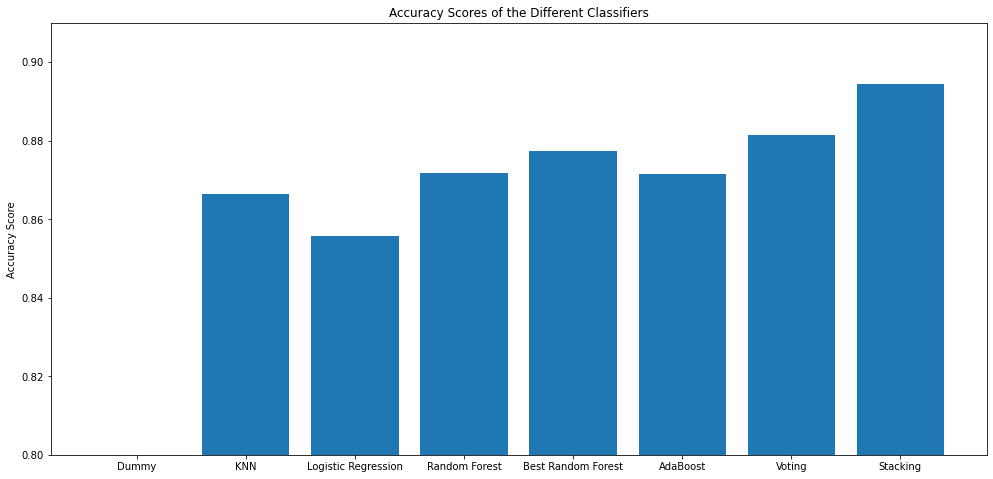

In [75]:
    accuracies = [accuracyDummy, accuracyKNN, accuracyLogReg, accuracyRandForests, best_accuracyRandForests, accuracyAdaBoost, accuracyXGBoost, accuracyVoting,  accuracyStacking, accuracykMeansVoting, accuracykMeansXGBoost]
    fig = plt.figure(figsize=(13,6))
    accuraciesSize = np.arange(len(accuracies))
    axes = fig.add_axes([0,0,1,1])
    labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'XGBoost', 'Voting', 'Stacking', 'KmeansVoting', 'KmeansXGB']
    axes.bar(labels, accuracies)
    axes.set_ylabel("Accuracy Score")
    axes.set_title("Accuracy Scores of the Different Classifiers")
    plt.rcParams['xtick.labelsize'] = 10
    axes.set_ylim([0.7, 0.92])

In [ ]:
#timeGraph

(0.0, 11000.0)

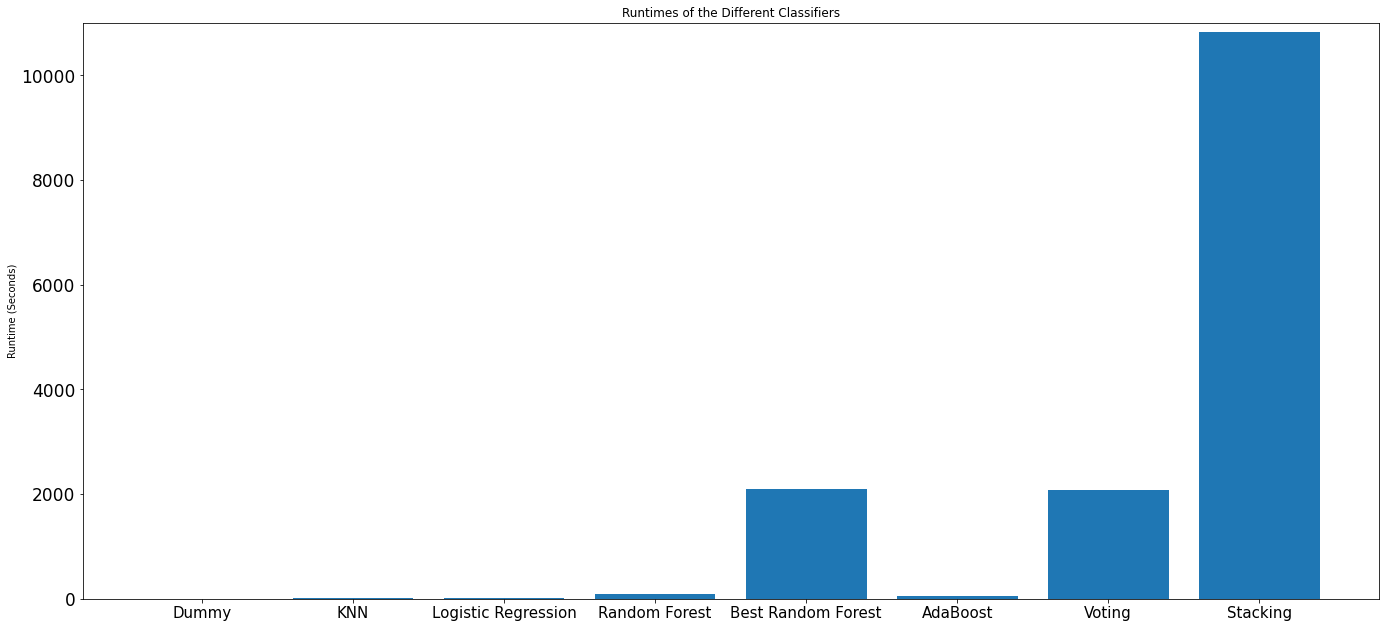

In [106]:
time = [timeDummy, timeKNN, timeLogReg, timeRandForests, time_best_RandForests, timeAdaBoost, timeVoting, timeStacking]
labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'Voting', 'Stacking']
fig = plt.figure(figsize=(18,8))

timeSize = np.arange(len(time))
axes = fig.add_axes([0,0,1,1])
labels = ['Dummy', 'KNN', 'Logistic Regression', 'Random Forest', 'Best Random Forest', 'AdaBoost', 'Voting', 'Stacking']
axes.bar(labels, time)
axes.set_ylabel("Runtime (Seconds)")
axes.set_title("Runtimes of the Different Classifiers")
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 17
plt.yticks(np.arange(0,12000, 2000))
axes.set_ylim([0, 11000])

In [107]:
results = pd.DataFrame(np.array([['Dummy', accuracyDummy, timeDummy],
                            ['KNN', accuracyKNN, timeKNN],
                            ['Logistic Regression', accuracyLogReg, timeLogReg],
                            ['Random Forests', accuracyRandForests, timeRandForests],
                            ['Best Random Forests', best_accuracyRandForests, time_best_RandForests],
                            ['AdaBoost', accuracyAdaBoost, timeAdaBoost],
                            ['Voting', accuracyVoting, timeVoting],
                            ['Stacking', accuracyStacking, timeStacking]]),
                  columns=['Model', 'Accuracy', 'Runtime (Seconds)'])
# ['XGBoost', accuracyXGBoost, timeXGBoost],
#                             ['Bagging', accuracyBagging, timeBagging],
#                             ['Pasting', accuracyPasting, timePasting],
resultsView = results.sort_values(by = 'Accuracy', axis = 0, ascending = False)
resultsView = resultsView.style.set_properties(**{'text-align': 'left'})
resultsView

,Model,Accuracy,Runtime (Seconds)
7,Stacking,0.8943333333333333,10825.018029212952
6,Voting,0.8815,2069.5006630420685
4,Best Random Forests,0.8773333333333333,2092.6486263275146
3,Random Forests,0.8716666666666667,93.044851064682
5,AdaBoost,0.8715,59.1989860534668
1,KNN,0.8663333333333333,6.324195861816406
2,Logistic Regression,0.8558333333333333,15.096415996551514
0,Dummy,0.10333333333333333,0.034219980239868164


In [ ]:
# start_timeVoting = time.time()
# modelVoting = VotingClassifier(
#     estimators=
#         [('KNN', modelKNN),
#          ('LogReg', modelLogReg),
#          ('RandForests', modelRandForests),
#          ('AdaBoost', modelAdaBoost),
#          ('XGBoost', modelXGBoost)],
#     voting='soft', n_jobs=-1, weights=[1, 1, 3, 3, 3])
# modelVoting.fit(X_train, y_train)
# predictionsVoting = modelVoting.predict(X_test_final)
# accuracyVoting = metrics.accuracy_score(y_test_final, predictionsVoting)
# print("Accuracy: ", accuracyVoting)
# timeVoting = time.time() - start_timeVoting
# print("Time taken to achive result: %s seconds\n\n" % (timeVoting))

# plt.figure(figsize=(5,4))
# print(classification_report(y_test_final, predictionsVoting))
# sns.heatmap(confusion_matrix(y_test_final, predictionsVoting), cmap = "Blues", annot=True, fmt = '.0f')